# Maternal Health Risk Assessment System

**Maternal health** is a cornerstone of public health, significantly influencing the well-being of future generations. Monitoring and managing the health risks associated with pregnancy is crucial for ensuring positive outcomes for both mothers and their children. The complexities of maternal health necessitate advanced analytical approaches to identify and mitigate risks effectively. This project leverages the power of machine learning to address these challenges, utilizing the "Maternal Health Risk Data Set" to predict pregnancy risk levels based on key health attributes.

**The primary aim** of this project is to explore and analyze the factors that influence maternal health risks. By employing a variety of machine learning models, including K-Nearest Neighbors (KNN), Naive Bayes, Support Vector Machines (SVM), Artificial Neural Networks (ANN), Random Forest, and Decision Trees, we seek to determine the most effective algorithm for accurate risk prediction. The insights gained from this analysis are intended to enhance maternal health monitoring, enabling healthcare providers to offer personalized and timely interventions.

Here is the link to the dataset:
https://archive.ics.uci.edu/dataset/863/maternal+health+risk

# Data Understanding

## 1- Preprocessing

### IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.svm import SVC
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Data Information

In [2]:
# Loading the dataset
data = pd.read_csv("Maternal Health Risk Data Set.csv")

print('Number of records = %d' % (data.shape[0]))
print('Number of features = %d' % (data.shape[1]))
data.head()

Number of records = 1014
Number of features = 7


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


#### Data Types

In [3]:
# Printing data types of our DataFrame 'data'
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

#### Data Statistics

In [4]:
print("Data Statistics:")
data.describe()

Data Statistics:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


- **Age:** This feature represents the age of a woman in years during pregnancy. Age can be a crucial factor in assessing maternal health risks as certain age groups may be associated with higher or lower risks of complications during pregnancy.
- **SystolicBP:** Systolic blood pressure refers to the upper value of blood pressure measured in millimeters of mercury **(mmHg)**. It indicates the pressure in the arteries when the heart contracts and pumps blood out during each heartbeat. Monitoring systolic blood pressure is essential during pregnancy as elevated levels can indicate hypertension, a condition that can lead to complications for both the mother and the baby.
- **DiastolicBP:** Diastolic blood pressure represents the lower value of blood pressure measured in **mmHg**. It indicates the pressure in the arteries when the heart is at rest between beats. Monitoring diastolic blood pressure alongside systolic blood pressure provides a comprehensive assessment of overall blood pressure health during pregnancy.
- **BS:** BS, or blood sugar, is a measure of blood glucose levels expressed in terms of a molar concentration **(millimoles per liter, mmol/L)**. Monitoring blood glucose levels is crucial during pregnancy as fluctuations can occur due to hormonal changes and metabolic demands. Abnormal blood glucose levels can indicate conditions such as gestational diabetes, which can pose risks to both the mother and the baby.
- **BodyTemp:** Body temperature represents the temperature of the body, typically measured in degrees Fahrenheit **(°F)**. Monitoring body temperature is important during pregnancy as elevated temperatures can indicate infections or other underlying health issues that may pose risks to maternal and fetal health.
- **HeartRate:** Heart rate refers to the number of heartbeats per minute **(bpm)** while the body is at rest. A normal resting heart rate indicates the efficiency of the heart in pumping blood throughout the body. Monitoring heart rate during pregnancy helps assess cardiovascular health and detect abnormalities that may require medical attention.
- **RiskLevel:** Risk level is the target variable in the dataset, representing the predicted intensity level of health risks during pregnancy based on the aforementioned attributes. It is a categorical variable indicating the severity of potential risks, such as low, medium, or high risk. Predicting risk levels is essential for early identification and management of maternal health issues to ensure the well-being of both the mother and the baby throughout pregnancy.

### Handling Missing Values and Checking for Duplicates

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicates:", duplicates)

Missing values:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
Number of duplicates: 562


In [6]:
# Find duplicated rows
duplicate_rows = data[data.duplicated()]

# Print duplicated rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
67     19         120           80   7.0      98.0         70   mid risk
72     19         120           80   7.0      98.0         70   mid risk
97     19         120           80   7.0      98.0         70   mid risk
106    50         140           90  15.0      98.0         90  high risk
107    25         140          100   6.8      98.0         80  high risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[562 rows x 7 columns]


In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicates:", duplicates)

Missing values:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
Number of duplicates: 562


**Note**

Since our dataset only has **1014** entries, having **562** exact copies is quite a big chunk. If we remove them, we will lose more than half of our data. Therefore, for the time being, we will not change anything.  

In [8]:
# Remove the word "risk" from the values in the "RiskLevel" column (just for simplification)
data["RiskLevel"] = data["RiskLevel"].str.replace("risk", "").str.strip()

# confirm the changes
print(data.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate RiskLevel
0   25         130           80  15.0      98.0         86      high
1   35         140           90  13.0      98.0         70      high
2   29          90           70   8.0     100.0         80      high
3   30         140           85   7.0      98.0         70      high
4   35         120           60   6.1      98.0         76       low


**Note**

At this stage we will start with Exploratory Data Analysis (EDA) and then proceed with splitting the data for modeling. We will keep feature scaling, data transformation, and normalization steps within the modeling pipeline, tailored to each algorithm's requirements.

## 2- Exploratory Data Analysis

The dataset demonstrates a notable variation in risk categories, with the majority of cases classified as "Low Risk" **(406 instances)**, indicating typical health characteristics and a lower likelihood of pregnancy problems. The rest are categorized as "Mid Risk" **(336 instances)**, which denotes a moderate risk level requiring increased surveillance. There are also **272** cases classified as "High Risk," which denotes a higher danger level for close observation and potential intervention.

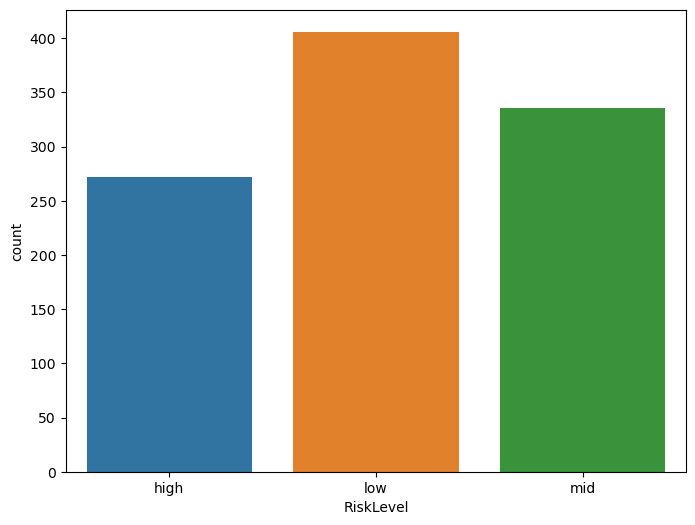

In [9]:
# Bar plot to visualize the distribution of the categorical feature 'RiskLevel'
plt.figure(figsize = (8, 6))
sns.countplot(data = data, x = 'RiskLevel')
plt.show()

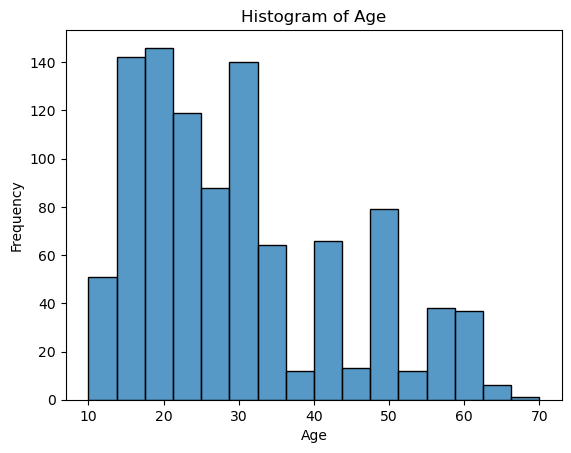

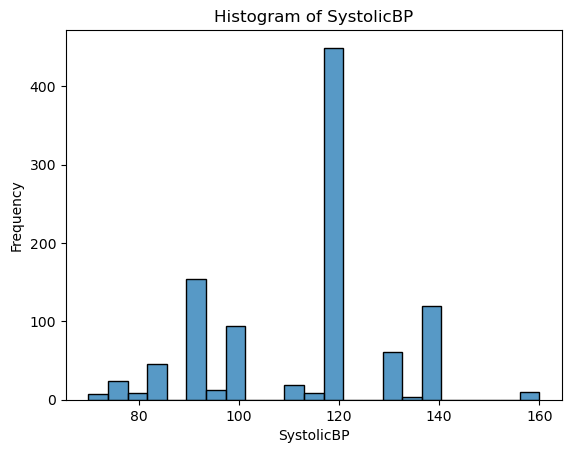

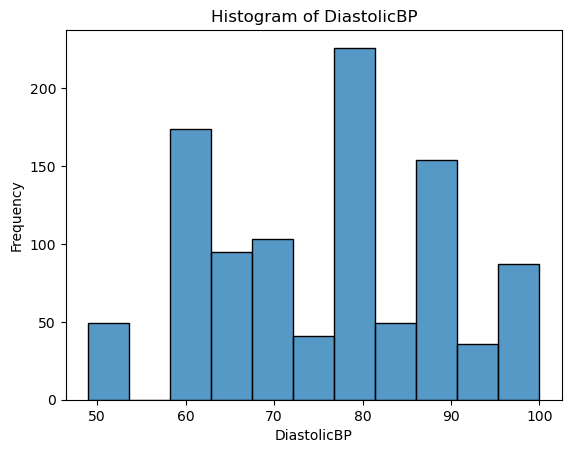

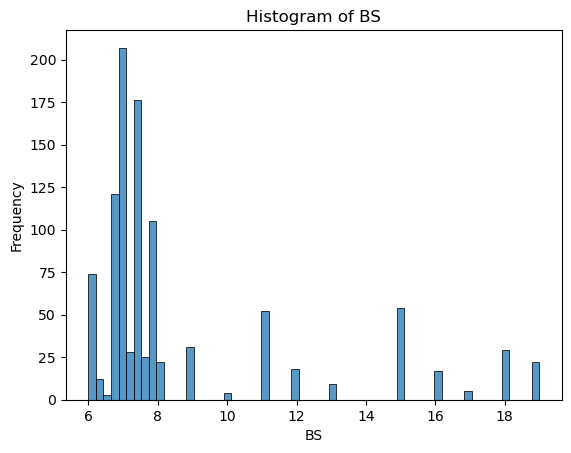

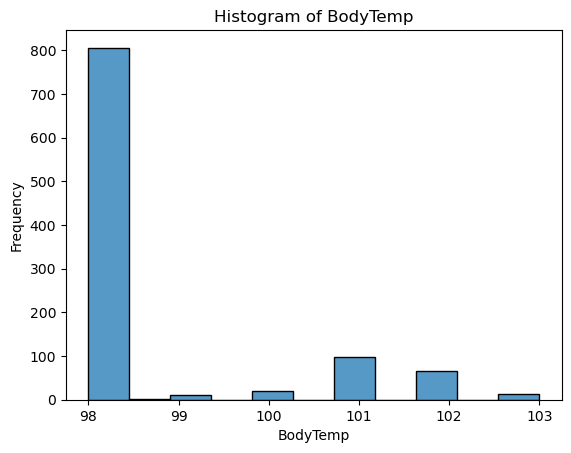

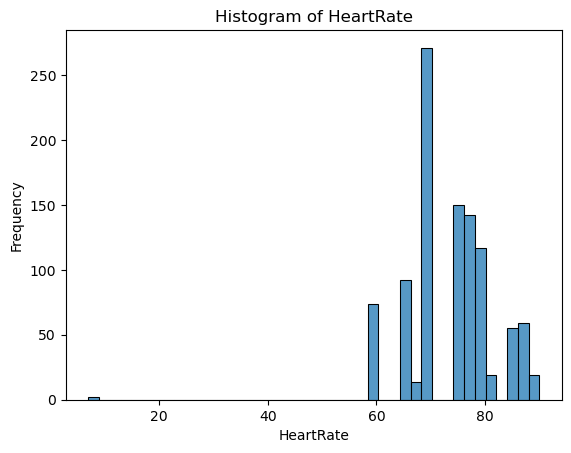

In [10]:
# Histogram to understand the distribution of numerical features
for column in data.select_dtypes(include = "number").columns:
    sns.histplot(data = data, x = column)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show() 

C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


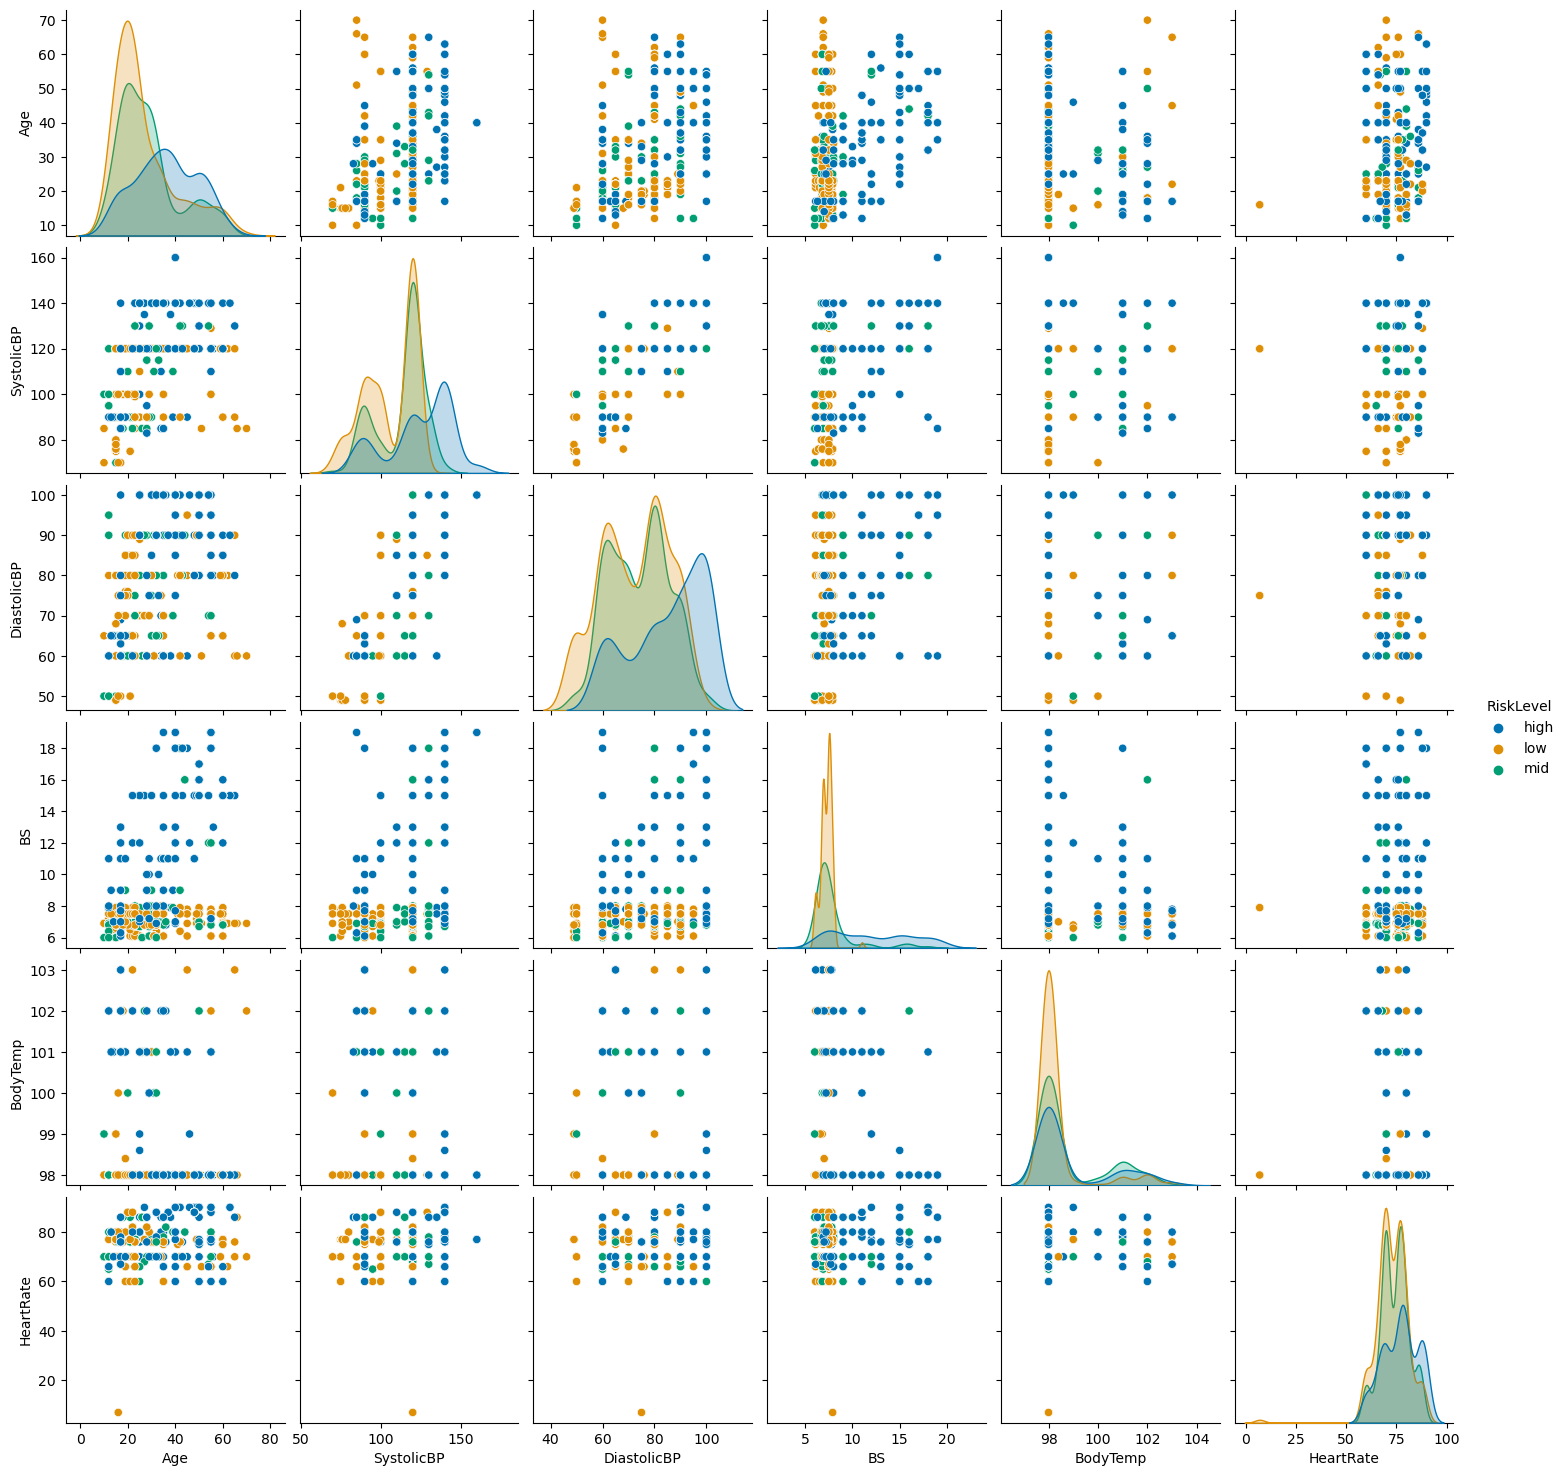

In [11]:
# Pairplot to visualize relationships between numerical features with colors based on risk level
sns.pairplot(data, hue='RiskLevel', palette='colorblind')
plt.show()

**Notes** 

- This pairplot provides a convenient way to visualize the relationships and distributions of numerical features in our dataset. It helps identify potential patterns, trends, or correlations between features, which can be useful for further analysis and modeling.
- This grid of scatter plots represents each numerical feature plotted against every other numerical feature (we have 6 numerical features).
- The scatter plots on the diagonal represent the distribution of each individual numerical feature (histograms for univariate data).
- The scatter plots off the diagonal represent the relationship between pairs of numerical features (bivariate data).

**Analysis**

**Age:** Pregnant women under 24 generally have lower health risks, which rise after 25. Surprisingly, there's a risk decrease in women over 59.

**Blood Pressure (SystolicBP and DiastolicBP):** Both indicators show a strong correlation and elevated values correspond to higher risks. Lower levels at a young age don't guarantee low risk, but may be protective in older age.

**Blood Glucose (BS):** Levels of 8 or higher indicate higher risks regardless of other factors.

**Body Temperature:** Most women maintain around 36.7°C, with higher temperatures correlating to higher risks. Normal temperature with low blood pressure suggests lower risk.

**Heart Rate:** An outlier in heart rate prompts further investigation. Higher rates correlate with increased risks, but have a modest effect compared to other factors.

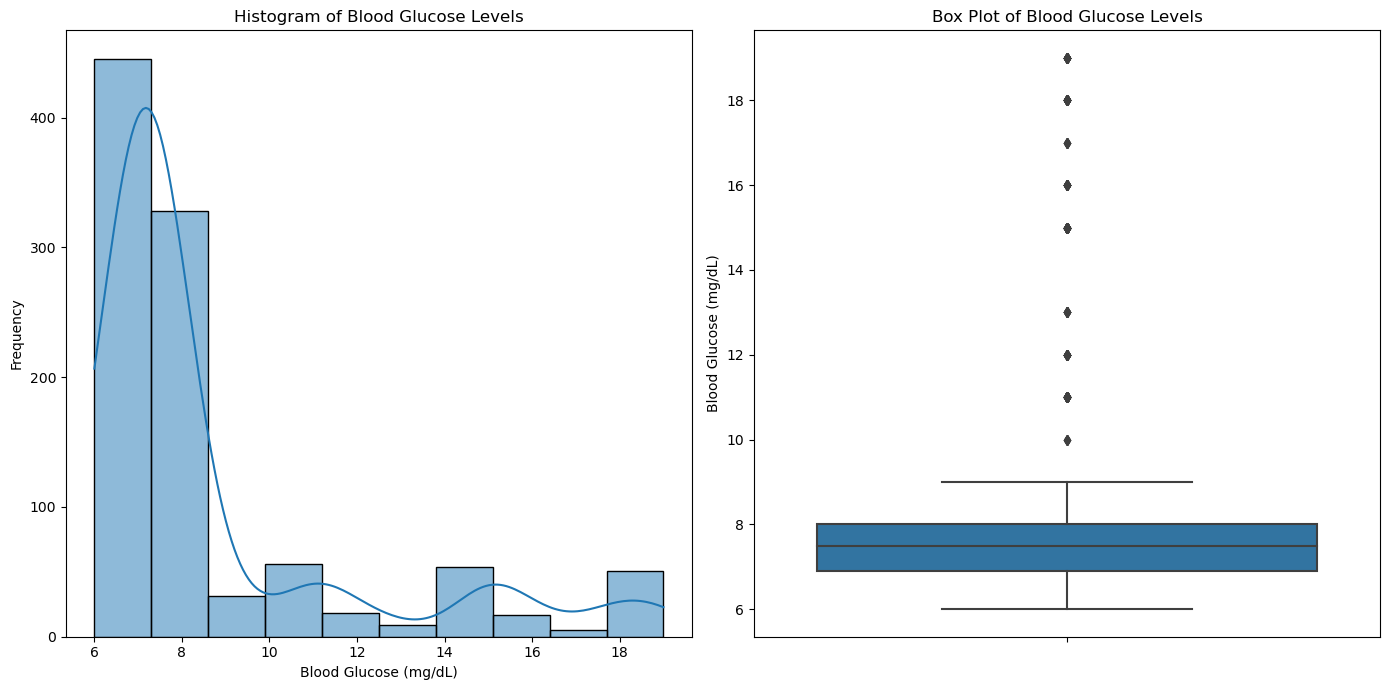

In [12]:
# Create a figure with two subplots: one for the histogram and one for the box plot
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plotting histogram for Blood Glucose Levels
sns.histplot(ax=axes[0], data=data, x='BS', kde=True, bins=10)
axes[0].set_title('Histogram of Blood Glucose Levels')
axes[0].set_xlabel('Blood Glucose (mg/dL)')
axes[0].set_ylabel('Frequency')

# Plotting box plot for Blood Glucose Levels
sns.boxplot(ax=axes[1], y=data['BS'])
axes[1].set_title('Box Plot of Blood Glucose Levels')
axes[1].set_ylabel('Blood Glucose (mg/dL)')

# Display the plots
plt.tight_layout()
plt.show()

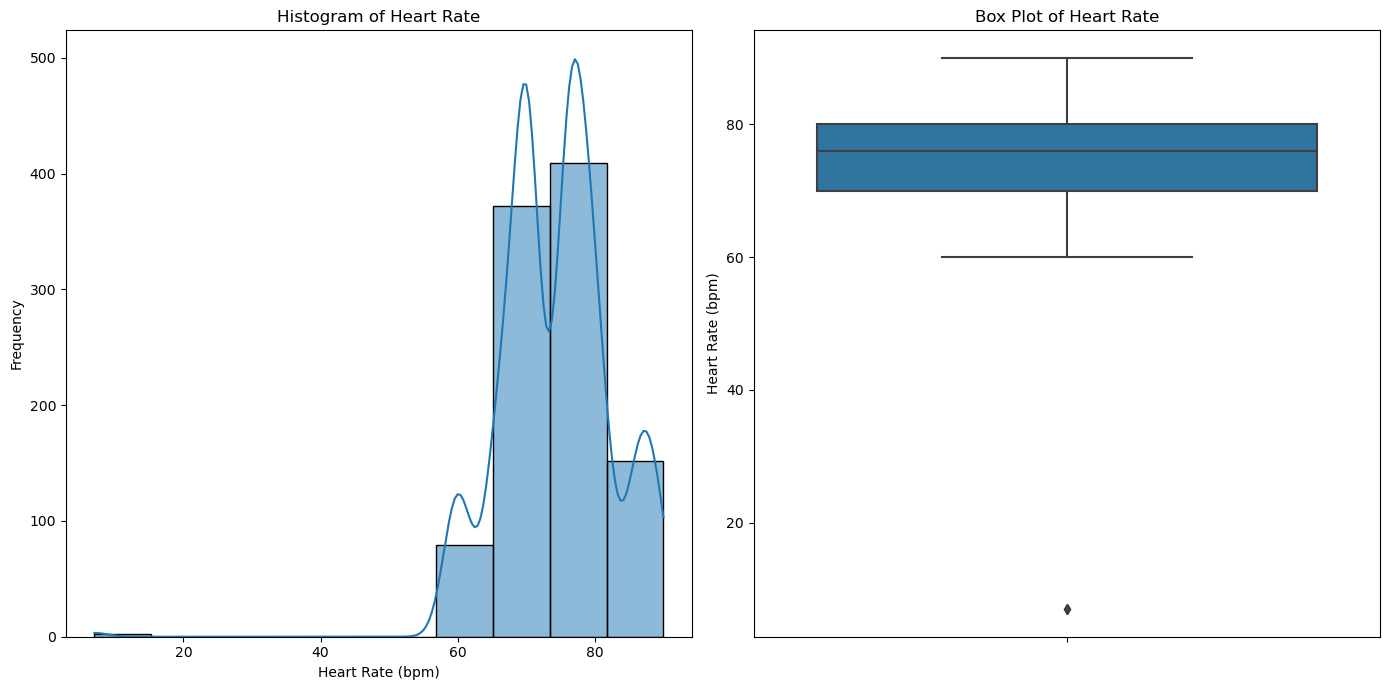

In [13]:
# Create a figure with two subplots: one for the histogram and one for the box plot
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plotting histogram for Heart Rate
sns.histplot(ax=axes[0], data=data, x='HeartRate', kde=True, bins=10)
axes[0].set_title('Histogram of Heart Rate')
axes[0].set_xlabel('Heart Rate (bpm)')
axes[0].set_ylabel('Frequency')

# Plotting box plot for Heart Rate
sns.boxplot(ax=axes[1], y=data['HeartRate'])
axes[1].set_title('Box Plot of Heart Rate')
axes[1].set_ylabel('Heart Rate (bpm)')

# Display the plots
plt.tight_layout()
plt.show()

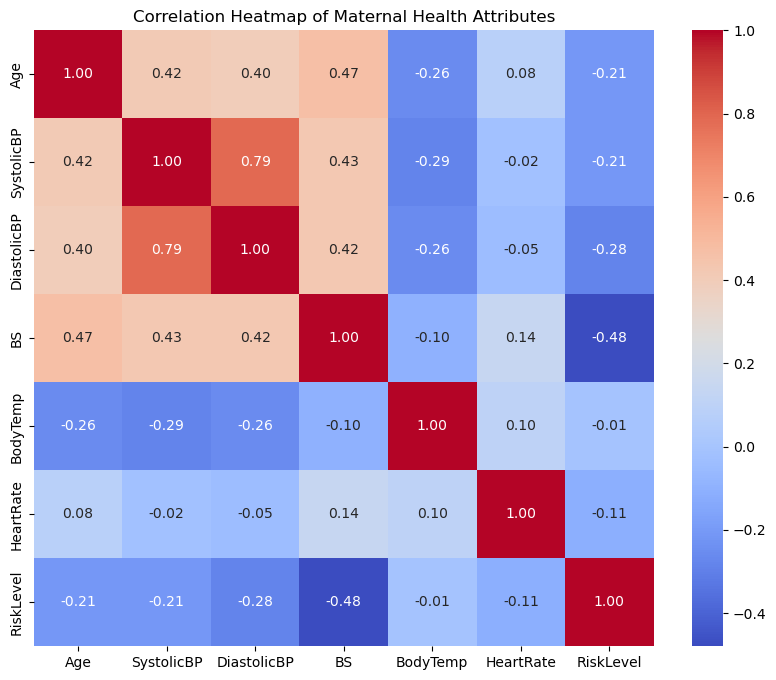

In [14]:
from sklearn.preprocessing import LabelEncoder
# Convert 'RiskLevel' column to numerical using label encoding
label_encoder = LabelEncoder()
data['RiskLevel'] = label_encoder.fit_transform(data['RiskLevel'])

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Maternal Health Attributes')
plt.show()

**SystolicBP** and **DiastolicBP** display a strong positive correlation with a correlation coefficient of **0.79**, indicating multicollinearity between the two variables. This suggests that there is redundant information present in both variables, as they are highly interrelated.

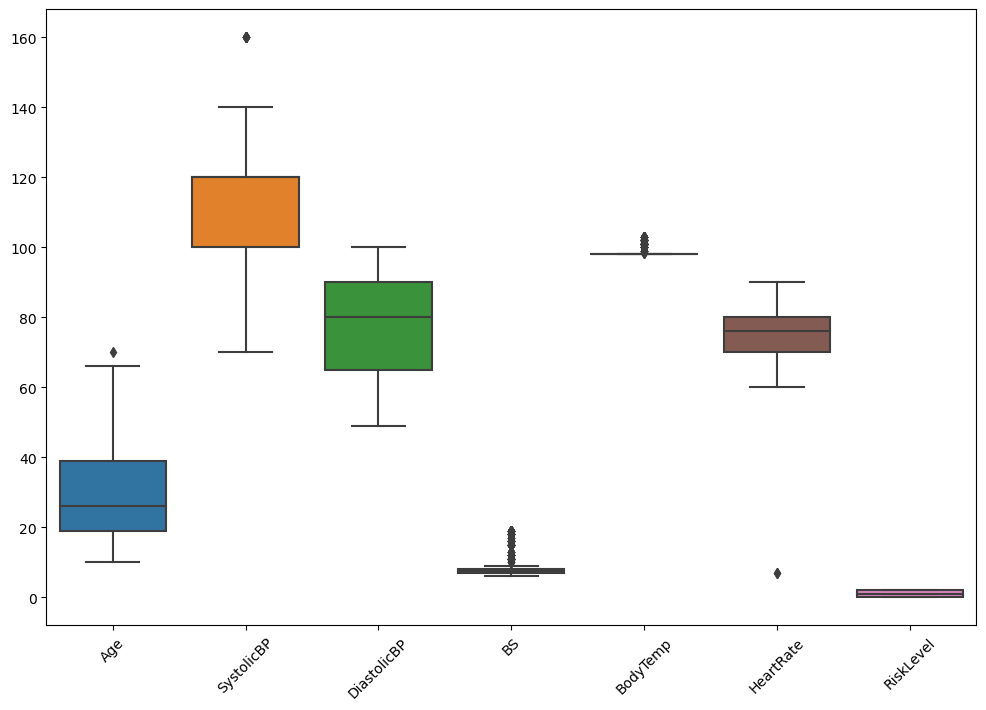

In [15]:
# Box plots to visualize the distribution of numerical features
plt.figure(figsize = (12, 8))
sns.boxplot(data = data)
plt.xticks(rotation = 45)
plt.show()

It should help us in identifying central tendencies, variability, and potential outliers in the data.

# Modeling

In our project, we deliberately chose to **exclude** models trained with duplicated data, despite their seemingly impressive results. This decision was driven by a commitment to ensuring the robustness and generalizability of our predictive model. Duplicates can artificially inflate the performance metrics, leading to overly optimistic evaluations that do not accurately reflect the model's true predictive power. By training on a dataset without duplicates, we aim to create a model that can generalize better to new, unseen data, thus providing more reliable and valid predictions. This approach helps prevent overfitting, where the model performs exceptionally well on the training data but fails to replicate this performance in real-world scenarios. Ultimately, our goal is to develop a model that maintains high accuracy and reliability across diverse and varied maternal health data, ensuring its practical applicability in real-world healthcare settings.

In [16]:
# Remove duplicates and rename the dataset
data_cleaned = data.drop_duplicates()
print("Number of duplicates after cleaning:", data_cleaned.duplicated().sum())

Number of duplicates after cleaning: 0


## 1- Splitting Data

In [17]:
X = data_cleaned.drop(columns=['RiskLevel'])
y = data_cleaned['RiskLevel']

# Split the dataset into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2- Models

### Random Forest

#### **Without Undersampling**

In [18]:
# Define the parameter grid with more focused hyperparameters to avoid overfitting
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearch to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the Random Forest Classifier with the best parameters
rf_clf_best = RandomForestClassifier(**best_params, random_state=42)
rf_clf_best.fit(X_train, y_train)

# Predict on training and test sets
rf_train_predictions = rf_clf_best.predict(X_train)
rf_test_predictions = rf_clf_best.predict(X_test)

# Calculate accuracy on training and test sets
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)

# Print training accuracy
print("\nRandom Forest Classifier Training Accuracy: {:.4f}".format(rf_train_accuracy))

# Print evaluation metrics on the test set
print("\nRandom Forest Classifier Test Metrics:")
print(f"Test Accuracy: {rf_test_accuracy:.4f}")

# Print the classification report
print("\nRandom Forest Classifier Classification Report:")
print(classification_report(y_test, rf_test_predictions))

# Predict on test set
y_pred = rf_clf_best.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("\nRandom Forest Classifier Confusion Matrix:")
print(conf_matrix)

Fitting 3 folds for each of 72 candidates, totalling 216 fits

Random Forest Classifier Training Accuracy: 0.8089

Random Forest Classifier Test Metrics:
Test Accuracy: 0.7253

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.71      0.98      0.82        47
           2       0.67      0.23      0.34        26

    accuracy                           0.73        91
   macro avg       0.73      0.66      0.65        91
weighted avg       0.72      0.73      0.68        91


Random Forest Classifier Confusion Matrix:
[[14  2  2]
 [ 0 46  1]
 [ 3 17  6]]


#### **With Fine-Tuning and Under-Sampling**

**Benefits**: By performing undersampling within each fold, we ensure that the distribution of the training and testing data within each iteration of the cross-validation process remains representative of the original dataset. This helps prevent biases that may arise when modifying the entire training dataset before splitting it into folds. As a result, the model gets a more accurate evaluation of its performance on unseen data.

**In contrast,** if we perform undersampling on the entire training dataset before splitting it into folds, we risk altering the distribution of the data in a way that may introduce bias into the training process, leading to suboptimal model performance as we noteced with the undersampled model.

In [19]:
# Initialize StratifiedKFold w
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an empty list to store evaluation metrics for each fold
fold_metrics = []

# Iterate through each fold and perform training/testing
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Undersample the training fold
    rus = RandomUnderSampler(random_state=42)
    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)
    
    # Initialize the Random Forest Classifier
    rf_clf = RandomForestClassifier(random_state=42)
    
    # Define the parameter grid with more focused hyperparameters to avoid overfitting
    param_grid = {
        'n_estimators': [100, 150, 200],
        'max_depth': [10, 20, 30],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    # Set up the GridSearchCV
    grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    
    # Fit the GridSearch to the resampled training data
    grid_search.fit(X_train_res, y_train_res)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    
    # Train the Random Forest Classifier with the best parameters
    rf_clf_best = RandomForestClassifier(**best_params, random_state=42)
    rf_clf_best.fit(X_train_res, y_train_res)
    
    # Predict on training and validation sets
    rf_train_predictions_best = rf_clf_best.predict(X_train_fold)
    rf_val_predictions_best = rf_clf_best.predict(X_val_fold)
    
    # Calculate accuracy
    rf_train_accuracy_best = accuracy_score(y_train_fold, rf_train_predictions_best)
    rf_val_accuracy_best = accuracy_score(y_val_fold, rf_val_predictions_best)
    
    # Calculate additional metrics
    rf_train_precision_best = precision_score(y_train_fold, rf_train_predictions_best, average='weighted')
    rf_val_precision_best = precision_score(y_val_fold, rf_val_predictions_best, average='weighted')
    rf_train_recall_best = recall_score(y_train_fold, rf_train_predictions_best, average='weighted')
    rf_val_recall_best = recall_score(y_val_fold, rf_val_predictions_best, average='weighted')
    rf_train_f1_best = f1_score(y_train_fold, rf_train_predictions_best, average='weighted')
    rf_val_f1_best = f1_score(y_val_fold, rf_val_predictions_best, average='weighted')
    
    # Binarize the output for AUC calculation
    lb = LabelBinarizer()
    y_val_binarized = lb.fit_transform(y_val_fold)
    rf_val_probabilities = rf_clf_best.predict_proba(X_val_fold)
    
    # Compute AUC score for each class and average it (weighted by support)
    rf_val_auc_best = roc_auc_score(y_val_binarized, rf_val_probabilities, average='weighted', multi_class='ovr')
    
    # Store evaluation metrics for the fold
    fold_metrics.append({
        'Fold': fold+1,
        'Best Parameters': best_params,
        'Training Accuracy': rf_train_accuracy_best,
        'Validation Accuracy': rf_val_accuracy_best,
        'Validation Precision': rf_val_precision_best,
        'Validation Recall': rf_val_recall_best,
        'Validation F1 Score': rf_val_f1_best,
        'Validation AUC Score': rf_val_auc_best
    })

# Print the evaluation metrics for each fold
for metrics in fold_metrics:
    print("\nRandom Forest Classifier Evaluation Metrics (Fold {}):".format(metrics['Fold']))
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Training Accuracy: {metrics['Training Accuracy']:.4f}")
    print(f"Validation Accuracy: {metrics['Validation Accuracy']:.4f}")
    print(f"Validation Precision: {metrics['Validation Precision']:.4f}")
    print(f"Validation Recall: {metrics['Validation Recall']:.4f}")
    print(f"Validation F1 Score: {metrics['Validation F1 Score']:.4f}")
    print(f"Validation AUC Score: {metrics['Validation AUC Score']:.4f}")

# Train the Random Forest Classifier on the full training data with the best parameters
rf_clf_final = RandomForestClassifier(**fold_metrics[0]['Best Parameters'], random_state=42)
rf_clf_final.fit(X_train, y_train)

# Predict on the test set
rf_test_predictions = rf_clf_final.predict(X_test)

# Train accuracy
rf_train_predictions = rf_clf_final.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)

# Print training accuracy
print("\nRandom Forest Classifier Training Accuracy: {:.4f}".format(rf_train_accuracy))

# Calculate evaluation metrics on the test set
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions, average='weighted')
rf_test_recall = recall_score(y_test, rf_test_predictions, average='weighted')
rf_test_f1 = f1_score(y_test, rf_test_predictions, average='weighted')

# Print evaluation metrics on the test set
print("\nRandom Forest Classifier Test Metrics:")
print(f"Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Test Precision: {rf_test_precision:.4f}")
print(f"Test Recall: {rf_test_recall:.4f}")
print(f"Test F1 Score: {rf_test_f1:.4f}")

# Predict on test set
y_pred = rf_clf_best.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("\nRandom Forest Classifier Confusion Matrix:")
print(conf_matrix)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Random Forest Classifier Evaluation Metrics (Fold 1):
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Training Accuracy: 0.7847
Validation Accuracy: 0.7260
Validation Precision: 0.7260
Validation Recall: 0.7260
Validation F1 Score: 0.7260
Validation AUC Score: 0.8672

Random Forest Classifier Evaluation Metrics (Fold 2):
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Training Accuracy: 0.8131
Validation Accuracy: 0.6250
Validation Precision: 0.6622
Validation Recall: 0.6250
Validation F1 Score: 0.6350
Validation AUC Score: 

#### **Analysis**

In our evaluation of the Random Forest classifier for predicting maternal health risks, we compared two methodologies: training the model on the entire dataset without undersampling and applying stratified k-fold cross-validation with undersampling within each fold. The model trained without undersampling achieved a training accuracy of **0.8089** and a test accuracy of **0.7253**, indicating a significant drop in performance on the unseen test data, likely due to overfitting. In contrast, the undersampled model, evaluated through a stratified k-fold approach, demonstrated varied results across different folds with an average training accuracy of approximately **0.7950** and validation accuracies ranging from **0.5556** to **0.7253**. Although the training accuracy for the undersampled model was slightly lower, the validation accuracy and other metrics (precision, recall, F1 score, and AUC) were more consistent and balanced. This suggests that the undersampled model offers better generalizability and robustness, mitigating the risk of overfitting by ensuring a balanced representation of classes during training. Hence, despite the slightly lower training accuracy, the undersampled approach proves to be more reliable and effective for real-world predictions, providing a better trade-off between bias and variance (*finding a balance where the model is complex enough to capture the underlying patterns in the training data (low bias) but not so complex that it also captures noise and outliers (low variance)*). 

##########################################################################

### Decision Tree

#### **Without Undersampling**

In [20]:
# Define the parameter grid with more focused hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearch to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the Decision Tree Classifier with the best parameters
dt_clf_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_clf_best.fit(X_train, y_train)

# Predict on training and test sets
dt_train_predictions = dt_clf_best.predict(X_train)
dt_test_predictions = dt_clf_best.predict(X_test)

# Calculate accuracy on training and test sets
dt_train_accuracy = accuracy_score(y_train, dt_train_predictions)
dt_test_accuracy = accuracy_score(y_test, dt_test_predictions)

# Print training accuracy
print("\nDecision Tree Classifier Training Accuracy: {:.4f}".format(dt_train_accuracy))

# Print evaluation metrics on the test set
print("\nDecision Tree Classifier Test Metrics:")
print(f"Test Accuracy: {dt_test_accuracy:.4f}")

Fitting 3 folds for each of 288 candidates, totalling 864 fits

Decision Tree Classifier Training Accuracy: 0.7701

Decision Tree Classifier Test Metrics:
Test Accuracy: 0.6044


#### **With Fine-Tuning and Under-Sampling**

In [21]:
# Initialize StratifiedKFold 
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an empty list to store evaluation metrics for each fold
fold_metrics = []

# Iterate through each fold and perform training/testing
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Undersample the training fold
    rus = RandomUnderSampler(random_state=42)
    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)
    
    # Initialize the Decision Tree Classifier
    dt_clf = DecisionTreeClassifier(random_state=42)
    
    # Define the parameter grid with more focused hyperparameters
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    # Set up the GridSearchCV
    grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    
    # Fit the GridSearch to the resampled training data
    grid_search.fit(X_train_res, y_train_res)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    
    # Train the Decision Tree Classifier with the best parameters
    dt_clf_best = DecisionTreeClassifier(**best_params, random_state=42)
    dt_clf_best.fit(X_train_res, y_train_res)
    
    # Predict on training and validation sets
    dt_train_predictions_best = dt_clf_best.predict(X_train_fold)
    dt_val_predictions_best = dt_clf_best.predict(X_val_fold)
    
    # Calculate accuracy
    dt_train_accuracy_best = accuracy_score(y_train_fold, dt_train_predictions_best)
    dt_val_accuracy_best = accuracy_score(y_val_fold, dt_val_predictions_best)
    
    # Calculate additional metrics
    dt_val_precision_best = precision_score(y_val_fold, dt_val_predictions_best, average='weighted')
    dt_val_recall_best = recall_score(y_val_fold, dt_val_predictions_best, average='weighted')
    dt_val_f1_best = f1_score(y_val_fold, dt_val_predictions_best, average='weighted')
    
    # Binarize the output for AUC calculation
    lb = LabelBinarizer()
    y_val_binarized = lb.fit_transform(y_val_fold)
    dt_val_probabilities = dt_clf_best.predict_proba(X_val_fold)
    
    # Compute AUC score for each class and average it (weighted by support)
    dt_val_auc_best = roc_auc_score(y_val_binarized, dt_val_probabilities, average='weighted', multi_class='ovr')
    
    # Store evaluation metrics for the fold
    fold_metrics.append({
        'Fold': fold+1,
        'Best Parameters': best_params,
        'Training Accuracy': dt_train_accuracy_best,
        'Validation Accuracy': dt_val_accuracy_best,
        'Validation Precision': dt_val_precision_best,
        'Validation Recall': dt_val_recall_best,
        'Validation F1 Score': dt_val_f1_best,
        'Validation AUC Score': dt_val_auc_best
    })

# Print the evaluation metrics for each fold
for metrics in fold_metrics:
    print("\nDecision Tree Classifier Evaluation Metrics (Fold {}):".format(metrics['Fold']))
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Training Accuracy: {metrics['Training Accuracy']:.4f}")
    print(f"Validation Accuracy: {metrics['Validation Accuracy']:.4f}")
    print(f"Validation Precision: {metrics['Validation Precision']:.4f}")
    print(f"Validation Recall: {metrics['Validation Recall']:.4f}")
    print(f"Validation F1 Score: {metrics['Validation F1 Score']:.4f}")
    print(f"Validation AUC Score: {metrics['Validation AUC Score']:.4f}")

# Train the Decision Tree Classifier on the full training data with the best parameters
dt_clf_final = DecisionTreeClassifier(**fold_metrics[0]['Best Parameters'], random_state=42)
dt_clf_final.fit(X_train, y_train)

# Predict on the test set
dt_test_predictions = dt_clf_final.predict(X_test)

# Train accuracy
dt_train_predictions = dt_clf_final.predict(X_train)
dt_train_accuracy = accuracy_score(y_train, dt_train_predictions)

# Print training accuracy
print("\nDecision Tree Classifier Training Accuracy: {:.4f}".format(dt_train_accuracy))

# Calculate evaluation metrics on the test set
dt_test_accuracy = accuracy_score(y_test, dt_test_predictions)
dt_test_precision = precision_score(y_test, dt_test_predictions, average='weighted')
dt_test_recall = recall_score(y_test, dt_test_predictions, average='weighted')
dt_test_f1 = f1_score(y_test, dt_test_predictions, average='weighted')

# Print evaluation metrics on the test set
print("\nDecision Tree Classifier Test Metrics:")
print(f"Test Accuracy: {dt_test_accuracy:.4f}")
print(f"Test Precision: {dt_test_precision:.4f}")
print(f"Test Recall: {dt_test_recall:.4f}")
print(f"Test F1 Score: {dt_test_f1:.4f}")

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits

Decision Tree Classifier Evaluation Metrics (Fold 1):
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Training Accuracy: 0.7604
Validation Accuracy: 0.6301
Validation Precision: 0.6310
Validation Recall: 0.6301
Validation F1 Score: 0.6280
Validation AUC Score: 0.8156

Decision Tree Classifier Evaluation Metrics (Fold 2):
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Training Accuracy: 0.6782
Validation Accuracy: 0.5833
Validation Precision: 0.6178
Validation Recall: 0.

#### **Analysis**

The Decision Tree model trained without undersampling exhibited a high training accuracy of **0.7701** but a significantly lower test accuracy of **0.6044**, indicating overfitting and poor generalization. In contrast, the Decision Tree model trained with undersampling and stratified k-fold cross-validation showed a more balanced performance, with validation accuracies ranging from **0.5833** to **0.6389** across folds and an improved test accuracy of **0.6593**. The inclusion of undersampling and cross-validation helped to mitigate overfitting, resulting in a better trade-off between bias and variance, thus enhancing the model's ability to generalize to new data.

### With Oversampling (Random-Forest + Decision-Tree)

In [27]:
# Set up SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid with more focused hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearch to the resampled training data
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Train the Random Forest Classifier with the best parameters
rf_clf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_clf_best.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
rf_train_predictions = rf_clf_best.predict(X_train)
rf_test_predictions = rf_clf_best.predict(X_test)

# Calculate evaluation metrics for Random Forest Classifier
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions, average='weighted')
rf_test_recall = recall_score(y_test, rf_test_predictions, average='weighted')
rf_test_f1 = f1_score(y_test, rf_test_predictions, average='weighted')

# Print evaluation metrics for Random Forest Classifier
print("\nRandom Forest Classifier Evaluation Metrics:")
print(f"Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Test Precision: {rf_test_precision:.4f}")
print(f"Test Recall: {rf_test_recall:.4f}")
print(f"Test F1 Score: {rf_test_f1:.4f}")

# Define the parameter grid with more focused hyperparameters for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Set up the GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearch to the resampled training data
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_

# Train the Decision Tree Classifier with the best parameters
dt_clf_best = DecisionTreeClassifier(**best_params_dt, random_state=42)
dt_clf_best.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
dt_train_predictions = dt_clf_best.predict(X_train)
dt_test_predictions = dt_clf_best.predict(X_test)

# Calculate evaluation metrics for Decision Tree Classifier
dt_train_accuracy = accuracy_score(y_train, dt_train_predictions)
dt_test_accuracy = accuracy_score(y_test, dt_test_predictions)
dt_test_precision = precision_score(y_test, dt_test_predictions, average='weighted')
dt_test_recall = recall_score(y_test, dt_test_predictions, average='weighted')
dt_test_f1 = f1_score(y_test, dt_test_predictions, average='weighted')

# Print evaluation metrics for Decision Tree Classifier
print("\nDecision Tree Classifier Evaluation Metrics:")
print(f"Test Accuracy: {dt_test_accuracy:.4f}")
print(f"Test Precision: {dt_test_precision:.4f}")
print(f"Test Recall: {dt_test_recall:.4f}")
print(f"Test F1 Score: {dt_test_f1:.4f}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Random Forest Classifier Evaluation Metrics:
Test Accuracy: 0.6593
Test Precision: 0.6410
Test Recall: 0.6593
Test F1 Score: 0.6427
Fitting 3 folds for each of 432 candidates, totalling 1296 fits

Decision Tree Classifier Evaluation Metrics:
Test Accuracy: 0.6044
Test Precision: 0.5935
Test Recall: 0.6044
Test F1 Score: 0.5954


C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


#### **Analysis**

The results of the classification models using oversampling techniques (SMOTE) to balance the dataset demonstrate the performance of both Random Forest and Decision Tree classifiers. For the Random Forest classifier, the average evaluation metrics across all folds are as follows: an accuracy of **0.6593**, precision of **0.6410**, recall of **0.6593**, and an F1 score of **0.6427**. On the other hand, the Decision Tree classifier achieved an average accuracy of **0.6044**, precision of **0.5935**, recall of **0.6044**, and an F1 score of **0.5954**. These results indicate that the Random Forest classifier performed better overall compared to the Decision Tree classifier, particularly in terms of AUC score, highlighting its superior ability to distinguish between classes.

##########################################################################

### SVM

#### **Without Undersampling**

In [34]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)  # You can adjust hyperparameters here
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_test = svm_model.predict(X_test_scaled)

# Make predictions on the training set
y_pred_train = svm_model.predict(X_train_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.7340720221606648
Test Accuracy: 0.6813186813186813
Confusion Matrix:
[[14  2  2]
 [ 1 45  1]
 [ 2 21  3]]
Classification Report:
              precision    recall  f1-score   support

   high risk       0.82      0.78      0.80        18
    low risk       0.66      0.96      0.78        47
    mid risk       0.50      0.12      0.19        26

    accuracy                           0.68        91
   macro avg       0.66      0.62      0.59        91
weighted avg       0.65      0.68      0.62        91



#### **With Fine-Tuning + Over-Sampling and Under-Sampling**

In [35]:
# Apply oversampling and undersampling to the training set
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply RandomUnderSampler to undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Tune hyperparameters using GridSearchCV with k-fold cross-validation
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svm_model = SVC(random_state=42)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test_scaled)

# Test set evaluation
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Training set evaluation
y_pred_train = best_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
print("Training Accuracy:", train_accuracy)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Test Accuracy: 0.6153846153846154
Confusion Matrix:
[[12  1  5]
 [ 2 37  8]
 [ 3 16  7]]
Classification Report:
              precision    recall  f1-score   support

   high risk       0.71      0.67      0.69        18
    low risk       0.69      0.79      0.73        47
    mid risk       0.35      0.27      0.30        26

    accuracy                           0.62        91
   macro avg       0.58      0.57      0.57        91
weighted avg       0.59      0.62      0.60        91

Training Accuracy: 0.8716577540106952


#### **Analysis**

In the first approach, we utilize a simple train-test split with fixed hyperparameters for an SVM model. The training accuracy achieved is **73.4%**, and the test accuracy is **68.1%**. The classification report shows varying precision, recall, and F1-score across different classes, indicating the model's performance discrepancies.

In the second approach, we adopt a more elaborate process. It involves preprocessing steps like SMOTE and RandomUnderSampler to handle class imbalance, followed by hyperparameter tuning using GridSearchCV with cross-validation. The best model obtained has hyperparameters C = 10, gamma = 0.1, and kernel = 'rbf'. However, the test accuracy is slightly lower at **61.5%** compared to the first approach. Despite this, the model's performance is more balanced across different classes, as seen in the classification report.

Overall, the second approach, despite having a lower test accuracy, provides a more balanced performance across different classes, suggesting better generalization. The choice between the two approaches depends on our priority between overall accuracy and balanced performance across classes.

##########################################################################

### ANN

#### **Without Undersampling**

In [53]:
# Encode the target variable into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Encode the target variable into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert target variable to one-hot encoding
y_train_encoded = to_categorical(y_train)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Train the model
history = model.fit(X_train_scaled, y_train_encoded , epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
y_pred_test = np.argmax(model.predict(X_test_scaled), axis=-1)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Training set evaluation
y_pred_train = np.argmax(model.predict(X_train_scaled), axis=-1)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)


Epoch 1/100


C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3140 - loss: 1.1274 - val_accuracy: 0.4521 - val_loss: 1.0467 - learning_rate: 0.0010
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4887 - loss: 1.0208 - val_accuracy: 0.6301 - val_loss: 0.9707 - learning_rate: 0.0010
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6124 - loss: 0.9540 - val_accuracy: 0.6438 - val_loss: 0.9168 - learning_rate: 0.0010
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6509 - loss: 0.9172 - val_accuracy: 0.6438 - val_loss: 0.8764 - learning_rate: 0.0010
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6577 - loss: 0.8655 - val_accuracy: 0.6438 - val_loss: 0.8438 - learning_rate: 0.0010
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6573 - loss: 0.8356 - val_accuracy: 0.6438 - val_loss: 0.8189 - learning_rate: 0.0010
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7075 - loss: 0.7813 - val_accuracy: 0.6438 - val_loss:

#### **Without Undersampling + with StratifiedKfold**

In [54]:
# Encode the target variable into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation metrics
train_accuracies = []
test_accuracies = []
classification_reports_train = []
classification_reports_test = []

# Iterate through each fold
for train_index, test_index in skf.split(X_scaled, y_encoded):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Convert target variable to one-hot encoding
    y_train_encoded = to_categorical(y_train)
    y_test_encoded = to_categorical(y_test)

    # Build the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),  
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')  
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

    # Train the model
    history = model.fit(X_train, y_train_encoded , epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=0)

    # Evaluate the model on training set
    y_pred_train = np.argmax(model.predict(X_train), axis=-1)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_accuracies.append(train_accuracy)
    classification_report_train = classification_report(y_train, y_pred_train)
    classification_reports_train.append(classification_report_train)

    # Evaluate the model on test set
    y_pred_test = np.argmax(model.predict(X_test), axis=-1)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_accuracies.append(test_accuracy)
    classification_report_test = classification_report(y_test, y_pred_test)
    classification_reports_test.append(classification_report_test)

# Print average training and test accuracies
print("Average Training Accuracy:", np.mean(train_accuracies))
print("Average Test Accuracy:", np.mean(test_accuracies))

C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Average Training Accuracy: 0.6913515250761391
Average Test Accuracy: 0.6747496947496948


C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

#### **Analysis**

The first approach involves a simple train-test split, resulting in a **68.1%** test accuracy. However, there are variations in performance across different classes, indicating potential class imbalances. On the other hand, the second approach employs k-fold cross-validation, resulting in a slightly lower average test accuracy of **67.4%** but we can clearly see the decrease on the amount of overfitting. This method provides a more robust evaluation framework. Despite their similarities in model architecture, the second approach's utilization of cross-validation enhances its effectiveness in handling potential dataset nuances and class imbalances.  

### KNN

Training Accuracy: 0.7617728531855956
Testing Accuracy: 0.7032967032967034
Confusion Matrix (Test Data):
[[12  4  2]
 [ 0 47  0]
 [ 2 19  5]]
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.67      1.00      0.80        47
           2       0.71      0.19      0.30        26

    accuracy                           0.70        91
   macro avg       0.75      0.62      0.62        91
weighted avg       0.72      0.70      0.65        91



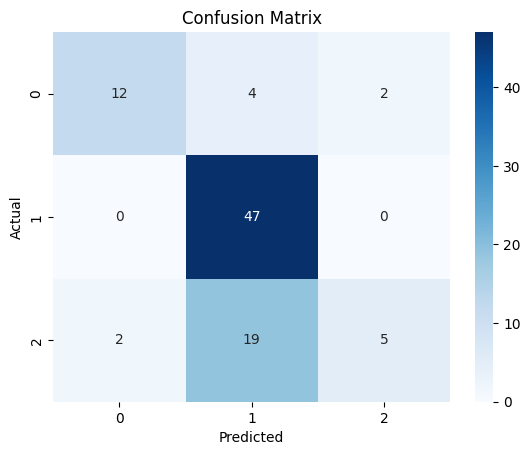

In [18]:

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predict the target values for the train and test set
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix (Test Data):")
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)
print("Classification Report (Test Data):")
class_report = classification_report(y_test, y_test_pred)
print(class_report)

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Knn with undersampling and hyperparameter tuning

In [31]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Apply RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_normalized, y_train)

# Print the class distribution after undersampling
print("Class distribution after undersampling:", np.bincount(y_train_under))

# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Define the Grid Search with Cross-Validation for undersampling
grid_search_under = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_under.fit(X_train_under, y_train_under)

# Print the best hyperparameters
print("Best Hyperparameters (UnderSampler):", grid_search_under.best_params_)

# Get the best model
best_knn_under = grid_search_under.best_estimator_

# Predict on the train set using the best model
y_train_pred_under = best_knn_under.predict(X_train_under)

# Print train accuracy
train_accuracy_under = accuracy_score(y_train_under, y_train_pred_under)
print("Train Accuracy (UnderSampler):", train_accuracy_under)

# Predict on the test set using the best model
y_test_pred_under = best_knn_under.predict(X_test_normalized)

# Print test accuracy
test_accuracy_under = accuracy_score(y_test, y_test_pred_under)
print("Test Accuracy (UnderSampler):", test_accuracy_under)

# Print confusion matrix for test set
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred_under))

# Print classification report for test set
print("Classification Report (UnderSampler):")
print(classification_report(y_test, y_test_pred_under))

# Print the classes
print("Classes:", label_encoder.classes_)



Class distribution after undersampling: [85 85 85]
Best Hyperparameters (UnderSampler): {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
Train Accuracy (UnderSampler): 0.6352941176470588
Test Accuracy (UnderSampler): 0.6813186813186813
Confusion Matrix (Test Data):
[[15  4  4]
 [ 3 41  3]
 [ 3 12  6]]
Classification Report (UnderSampler):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        23
           1       0.72      0.87      0.79        47
           2       0.46      0.29      0.35        21

    accuracy                           0.68        91
   macro avg       0.63      0.60      0.61        91
weighted avg       0.66      0.68      0.66        91

Classes: ['high risk' 'low risk' 'mid risk']


#### Result analysis for knn

The decrease in overall testing accuracy can be partly explained by the fact that the training dataset became smaller after we balanced the class distribution through undersampling. With fewer examples to learn from, especially from the majority class, the model may not have had enough exposure to various patterns in the data, leading to a drop in accuracy. Nonetheless, despite this trade-off, the refined KNN model showed improvement in correctly identifying instances from minority classes, highlighting the effectiveness of our approach in handling class imbalance.

### Naïve Bayes

In [48]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Instantiate the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred_gnb = gnb.predict(X_test_normalized)

# Calculate train accuracy
train_accuracy_gnb = gnb.score(X_train_normalized, y_train)
print("Train Accuracy (Gaussian Naive Bayes):", train_accuracy_gnb)

# Calculate test accuracy
test_accuracy_gnb = gnb.score(X_test_normalized, y_test)
print("Test Accuracy (Gaussian Naive Bayes):", test_accuracy_gnb)

# Print the classification report
print("Classification Report (Gaussian Naive Bayes):")
print(classification_report(y_test, y_pred_gnb))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))

Train Accuracy (Gaussian Naive Bayes): 0.6703601108033241
Test Accuracy (Gaussian Naive Bayes): 0.6483516483516484
Classification Report (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.91      0.43      0.59        23
           1       0.63      1.00      0.77        47
           2       0.40      0.10      0.15        21

    accuracy                           0.65        91
   macro avg       0.65      0.51      0.50        91
weighted avg       0.65      0.65      0.58        91

Confusion Matrix:
[[10 10  3]
 [ 0 47  0]
 [ 1 18  2]]


#### Result analysis for naive bayes

The training accuracy is approximately 67.04%, while the test accuracy is around 64.84%.
The classification report shows that the precision, recall, and F1-score for each class. It indicates that the model performs relatively well for class 1 (low risk), achieving a precision of 63%, recall of 100%, and an F1-score of 77%. However, the performance for classes 0 (high risk) and 2 (mid risk) is lower, with lower precision, recall, and F1-score values.
The low recall and F1-score for class 0 and class 2 indicate that the model struggles to correctly classify instances of these classes.

## Adding Noise to the Duplicates

In [68]:
import numpy as np
import pandas as pd

# Step 1: Remove duplicates
non_duplicates = data.drop_duplicates()

# Step 2: Apply noise to the duplicate rows while keeping the target variable unchanged
duplicates = data[data.duplicated()]

def add_noise_to_duplicates(duplicates, noise_level=0.1):
    noisy_duplicates = duplicates.copy()
    numeric_columns = noisy_duplicates.select_dtypes(include=np.number).columns
    
    # Calculate noise magnitude
    noise_magnitude = noise_level * (noisy_duplicates[numeric_columns].max() - noisy_duplicates[numeric_columns].min())
    
    # Generate noise
    noise = np.random.uniform(-noise_magnitude, noise_magnitude, size=noisy_duplicates[numeric_columns].shape)
    
    # Add/subtract noise to duplicates
    noisy_duplicates[numeric_columns] += noise
    
    return noisy_duplicates

noisy_duplicates = add_noise_to_duplicates(duplicates)

# Step 3: Aggregate noisy duplicates with non-duplicates to reconstruct the dataset
final_dataset = pd.concat([non_duplicates, noisy_duplicates], ignore_index=True)

# Ensure the order of columns is consistent
final_dataset = final_dataset[data.columns]

# Example usage
print("Original number of rows:", len(data))
print("Final dataset number of rows:", len(final_dataset))

Original number of rows: 1014
Final dataset number of rows: 1014


In [69]:
X = final_dataset.drop(columns=['RiskLevel'])
y = final_dataset['RiskLevel']

# Split the dataset into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Initialize StratifiedKFold
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an empty list to store evaluation metrics for each fold
fold_metrics = []

# Iterate through each fold and perform training/testing
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Undersample the training fold
    rus = RandomUnderSampler(random_state=42)
    X_train_res, y_train_res = rus.fit_resample(X_train_fold, y_train_fold)
    
    # Initialize the Random Forest Classifier
    rf_clf = RandomForestClassifier(random_state=42)
    
    # Define the parameter grid with more focused hyperparameters to avoid overfitting
    param_grid = {
        'n_estimators': [100, 150, 200],
        'max_depth': [10, 20, 30],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    # Set up the GridSearchCV
    grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    
    # Fit the GridSearch to the resampled training data
    grid_search.fit(X_train_res, y_train_res)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    
    # Train the Random Forest Classifier with the best parameters
    rf_clf_best = RandomForestClassifier(**best_params, random_state=42)
    rf_clf_best.fit(X_train_res, y_train_res)
    
    # Predict on training and validation sets
    rf_train_predictions_best = rf_clf_best.predict(X_train_fold)
    rf_val_predictions_best = rf_clf_best.predict(X_val_fold)
    
    # Calculate accuracy
    rf_train_accuracy_best = accuracy_score(y_train_fold, rf_train_predictions_best)
    rf_val_accuracy_best = accuracy_score(y_val_fold, rf_val_predictions_best)
    
    # Calculate additional metrics
    rf_train_precision_best = precision_score(y_train_fold, rf_train_predictions_best, average='weighted')
    rf_val_precision_best = precision_score(y_val_fold, rf_val_predictions_best, average='weighted')
    rf_train_recall_best = recall_score(y_train_fold, rf_train_predictions_best, average='weighted')
    rf_val_recall_best = recall_score(y_val_fold, rf_val_predictions_best, average='weighted')
    rf_train_f1_best = f1_score(y_train_fold, rf_train_predictions_best, average='weighted')
    rf_val_f1_best = f1_score(y_val_fold, rf_val_predictions_best, average='weighted')
    
    # Binarize the output for AUC calculation
    lb = LabelBinarizer()
    y_val_binarized = lb.fit_transform(y_val_fold)
    rf_val_probabilities = rf_clf_best.predict_proba(X_val_fold)
    
    # Compute AUC score for each class and average it (weighted by support)
    rf_val_auc_best = roc_auc_score(y_val_binarized, rf_val_probabilities, average='weighted', multi_class='ovr')
    
    # Store evaluation metrics for the fold
    fold_metrics.append({
        'Fold': fold+1,
        'Best Parameters': best_params,
        'Training Accuracy': rf_train_accuracy_best,
        'Validation Accuracy': rf_val_accuracy_best,
        'Validation Precision': rf_val_precision_best,
        'Validation Recall': rf_val_recall_best,
        'Validation F1 Score': rf_val_f1_best,
        'Validation AUC Score': rf_val_auc_best
    })

# Print the evaluation metrics for each fold
for metrics in fold_metrics:
    print("\nRandom Forest Classifier Evaluation Metrics (Fold {}):".format(metrics['Fold']))
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Training Accuracy: {metrics['Training Accuracy']:.4f}")
    print(f"Validation Accuracy: {metrics['Validation Accuracy']:.4f}")
    print(f"Validation Precision: {metrics['Validation Precision']:.4f}")
    print(f"Validation Recall: {metrics['Validation Recall']:.4f}")
    print(f"Validation F1 Score: {metrics['Validation F1 Score']:.4f}")
    print(f"Validation AUC Score: {metrics['Validation AUC Score']:.4f}")

# Train the Random Forest Classifier on the full training data with the best parameters
rf_clf_final = RandomForestClassifier(**fold_metrics[0]['Best Parameters'], random_state=42)
rf_clf_final.fit(X_train, y_train)

# Predict on the test set
rf_test_predictions = rf_clf_final.predict(X_test)

# Train accuracy
rf_train_predictions = rf_clf_final.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)

# Print training accuracy
print("\nRandom Forest Classifier Training Accuracy: {:.4f}".format(rf_train_accuracy))

# Calculate evaluation metrics on the test set
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions, average='weighted')
rf_test_recall = recall_score(y_test, rf_test_predictions, average='weighted')
rf_test_f1 = f1_score(y_test, rf_test_predictions, average='weighted')

# Print evaluation metrics on the test set
print("\nRandom Forest Classifier Test Metrics:")
print(f"Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Test Precision: {rf_test_precision:.4f}")
print(f"Test Recall: {rf_test_recall:.4f}")
print(f"Test F1 Score: {rf_test_f1:.4f}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Random Forest Classifier Evaluation Metrics (Fold 1):
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Training Accuracy: 0.8287
Validation Accuracy: 0.6933
Validation Precision: 0.6833
Validation Recall: 0.6933
Validation F1 Score: 0.6823
Validation AUC Score: 0.8459

Random Forest Classifier Evaluation Metrics (Fold 2):
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Training Accuracy: 0.8320
Validation Accuracy: 0.7346
Validation Precision: 0.7255
Validation Recall: 0.7346
Validation F1 Score: 0.7251
Validation AUC Score: 

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Initialize StratifiedKFold
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=strat_k_fold, n_jobs=-1, verbose=2)

# Fit the GridSearch to the data
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Gradient Boosting Classifier with the best parameters
gb_clf_best = GradientBoostingClassifier(**best_params, random_state=42)
gb_clf_best.fit(X_train_res, y_train_res)

# Predict on training and testing sets
gb_train_predictions_best = gb_clf_best.predict(X_train_fold)
gb_val_predictions_best = gb_clf_best.predict(X_val_fold)

# Calculate accuracy
gb_train_accuracy_best = accuracy_score(y_train_fold, gb_train_predictions_best)
gb_val_accuracy_best = accuracy_score(y_val_fold, gb_val_predictions_best)

# Print results
print("\nGradient Boosting Classifier with Fine-Tuning and Under-Sampling")
print(f"Training Accuracy: {gb_train_accuracy_best:.4f}")
print(f"Validation Accuracy: {gb_val_accuracy_best:.4f}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Gradient Boosting Classifier with Fine-Tuning and Under-Sampling
Training Accuracy: 0.8228
Validation Accuracy: 0.6728


#### **Notes**

This code aims to improve the performance of a predictive model by addressing duplicate data and using advanced machine learning techniques. Initially, it removes duplicate rows from the dataset and then adds noise to these duplicates to mitigate potential overfitting. The noisy duplicates are then aggregated back into the dataset.

A Random Forest Classifier is used to evaluate the impact of this preprocessing. The model undergoes hyperparameter tuning using GridSearchCV with stratified k-fold cross-validation to ensure robust performance evaluation across different subsets of the data.

Despite these efforts, the Random Forest model shows signs of overfitting, with significantly higher training accuracy compared to validation and test accuracies. The test accuracy, around **0.69**, suggests that adding noise to duplicates did not substantially enhance model performance.

To improve predictive accuracy, a Gradient Boosting Classifier is introduced, also undergoing a similar hyperparameter tuning process. This model, which is often more robust to overfitting, shows a training accuracy of **0.8228** and a validation accuracy of **0.6728**. Despite some improvement, overfitting remains an issue.